In [1]:
print("I Wayan Rangga Rijasa - 0706022210019")
print("Adult Census Income Dataset")

I Wayan Rangga Rijasa - 0706022210019
Adult Census Income Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
url = 'https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/adult.csv'
df = pd.read_csv(url)
df.head(5)

## import, read, and display first 5 data of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

## provide summary of the dataframe while also checking for missing value
## no missing value found, no data cleaning needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

## Technically there is no null, but there is '?' in the dataset and that is what I want to remove

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill NaN values in categorical columns with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])


# Check if any missing values remain and display cleaned dataset
df.isnull().sum()
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df.describe()

## Displays descriptive statistics of each numerical columns in the dataframe

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


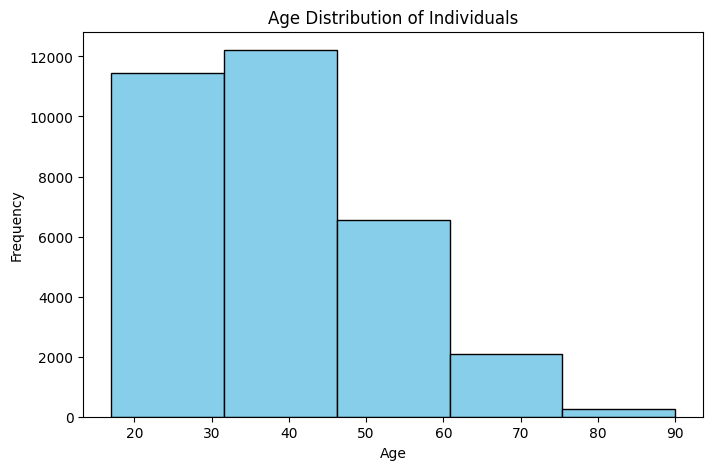

In [13]:
## Visualization 1 Histogram for Age Distribution

plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Individuals')
plt.show()

## This visualization is useful for identifying the age range and the most common age groups among the individuals in the dataset.

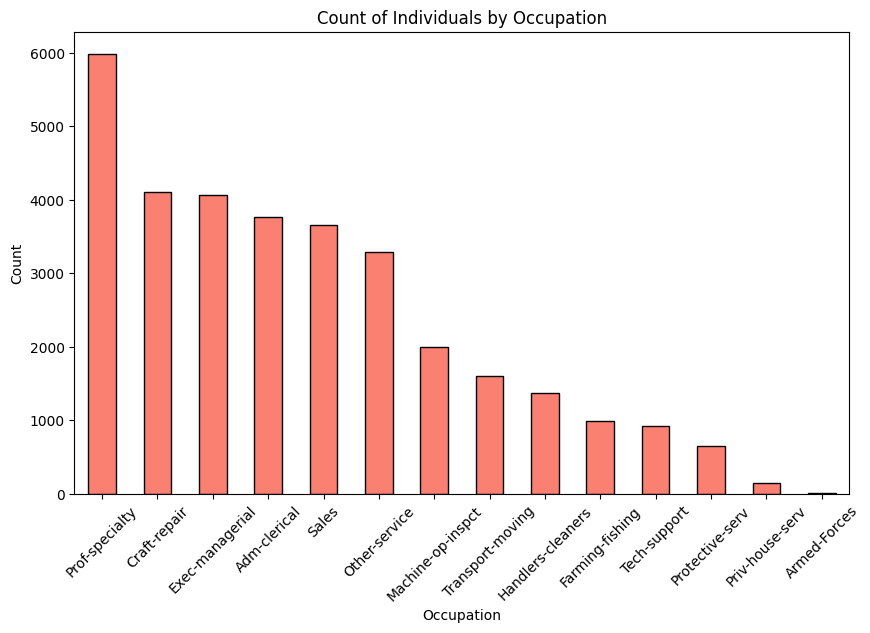

In [14]:
## Visualization 2 Bar plot for Occupation Counts

plt.figure(figsize=(10, 6))
df['occupation'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Individuals by Occupation')
plt.xticks(rotation=45)
plt.show()


## This can help identify the most common occupations in the dataset and understand the employment spread.
## Note* Prof-specialty result is skewed because fillna is used to fill the transform '?' value in the dataset

In [15]:
## Machine Learning Preparation

# Encoding target variable `income`
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Binary encoding for income

# Feature and target variable setup
X = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying shapes of training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

## splits the dataset into training and test sets and prints the shape (number of rows and columns) of the training and test feature datasets.

X_train shape: (26048, 6)
X_test shape: (6513, 6)
y_train shape: (26048,)
y_test shape: (6513,)


Model accuracy score with criterion entropy: 0.8036
Training set score: 0.8017
Test set score: 0.8036


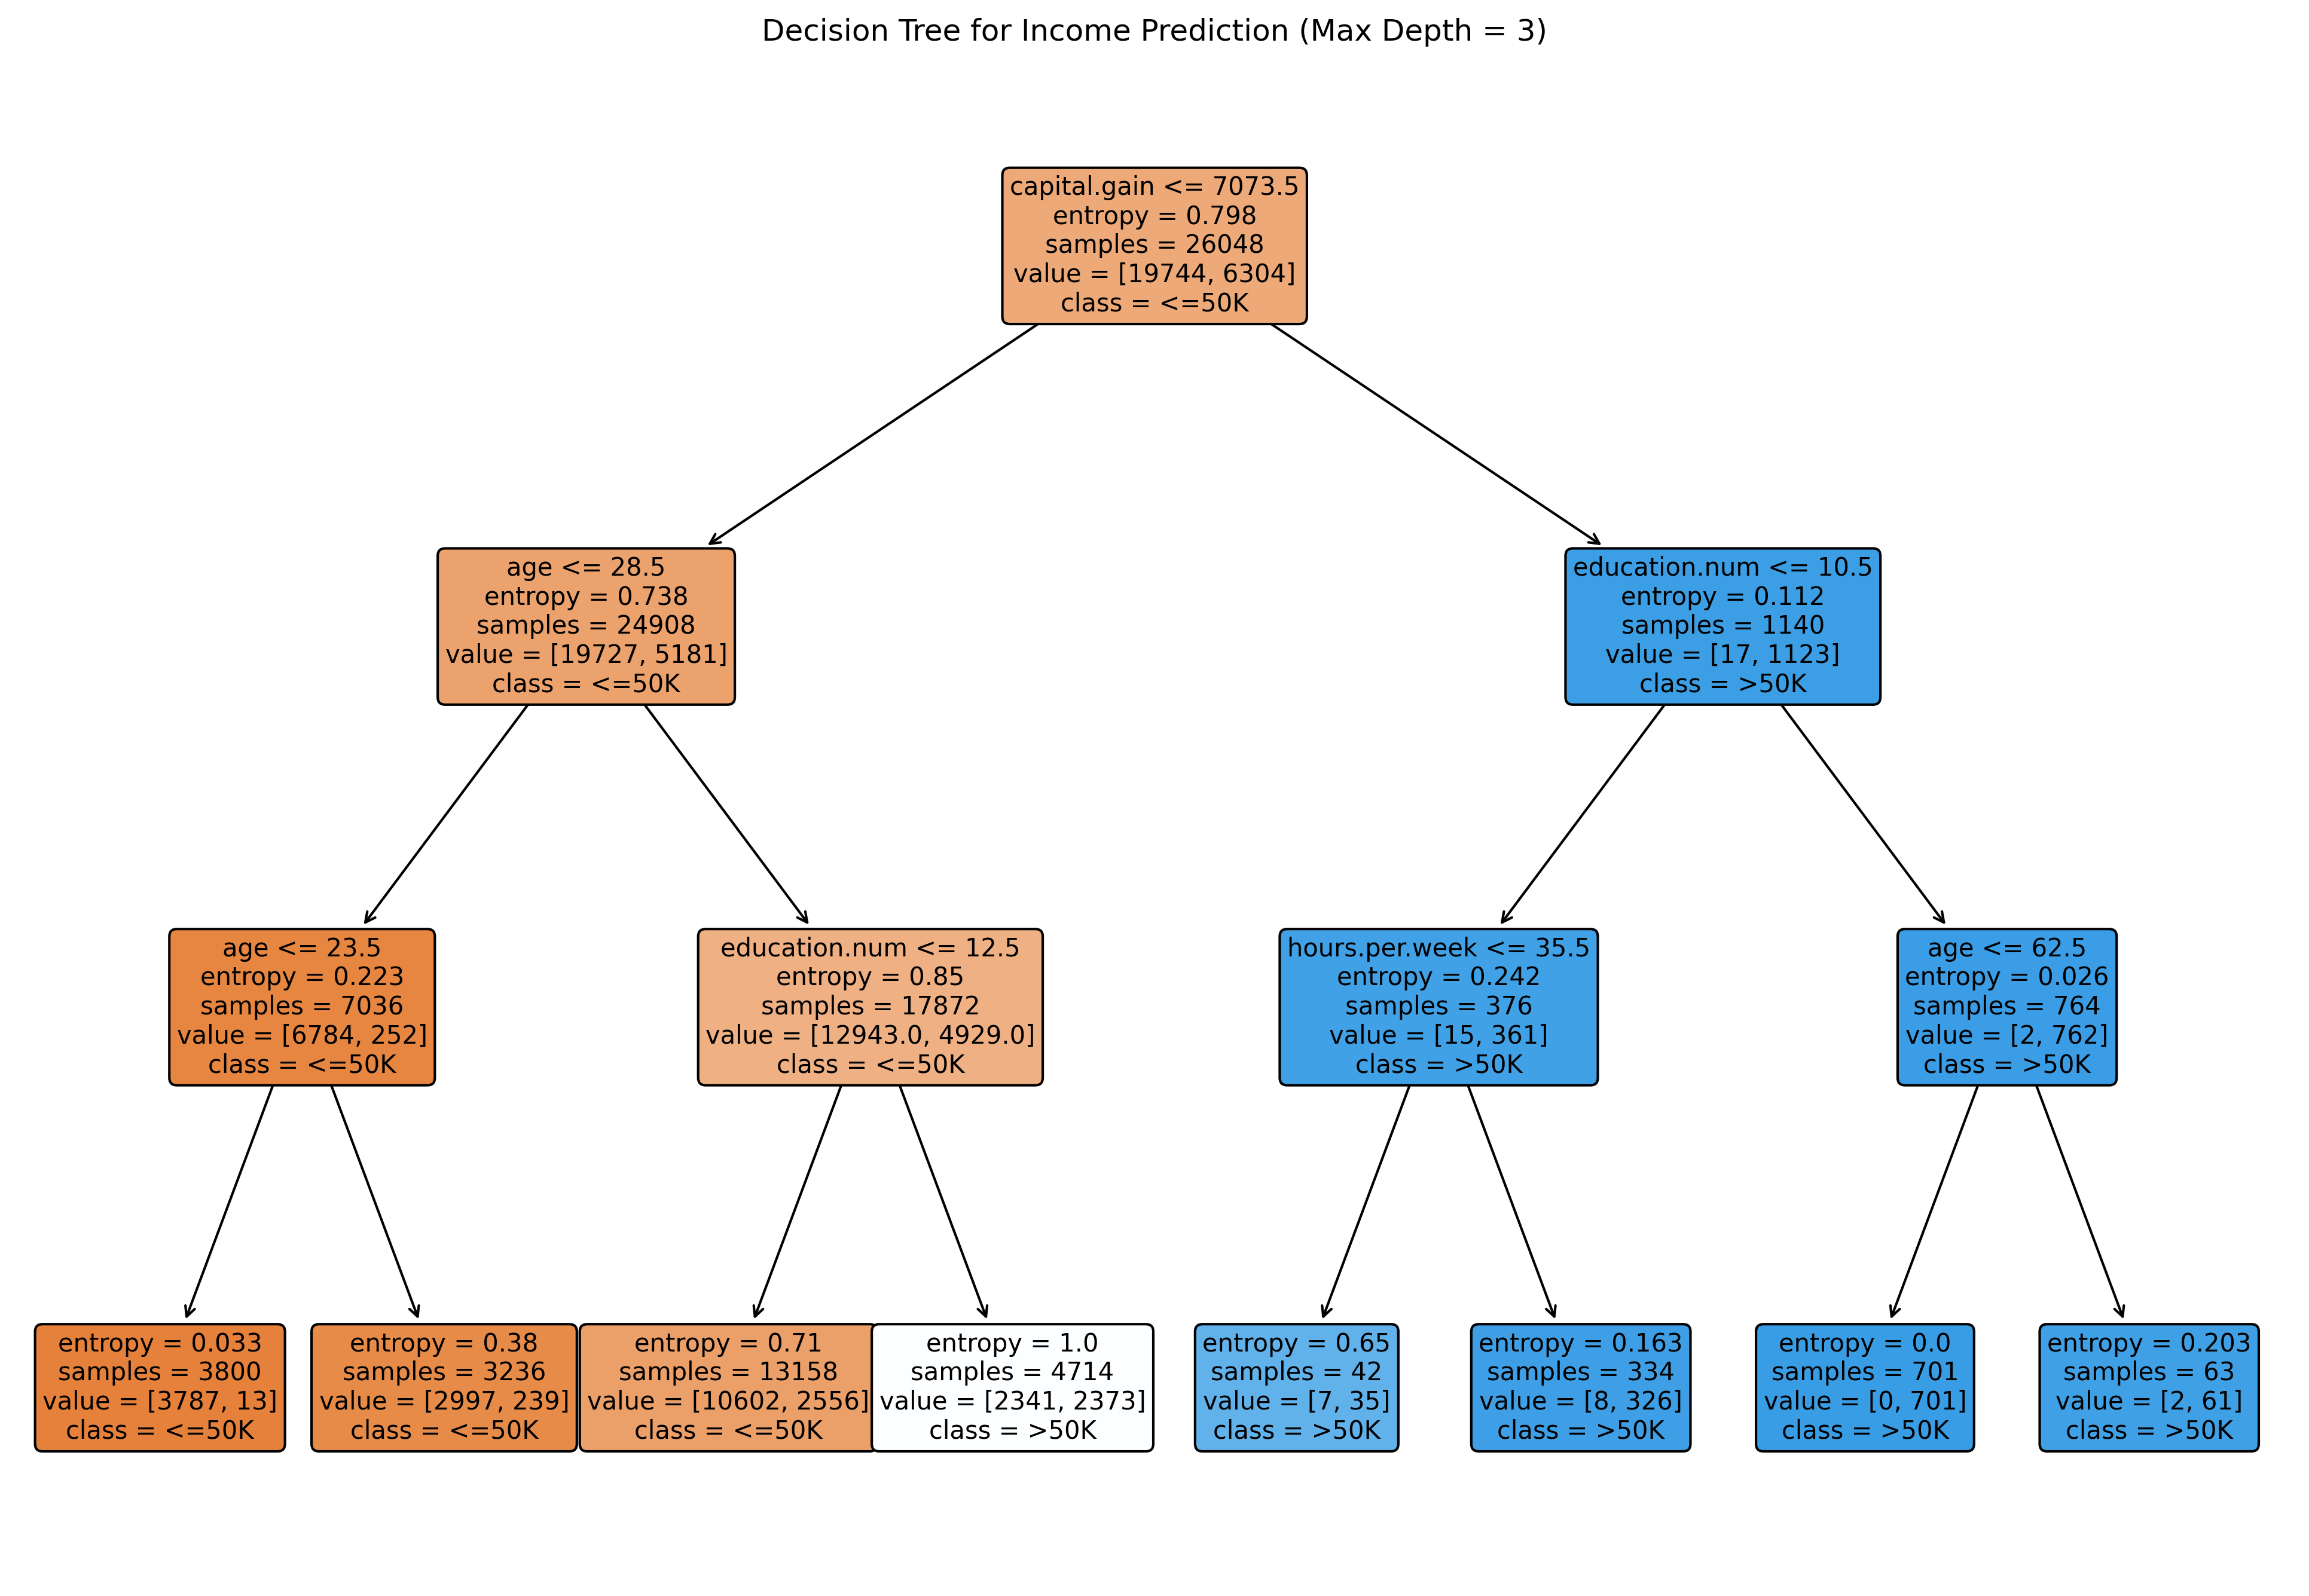

In [17]:
## Decision Tree
## Criterion Entropy

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))
print("Training set score: {0:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(X_test, y_test)))

plt.figure(figsize=(13, 9), dpi=300)
plot_tree(clf_en, 
          feature_names=X_train.columns,  
          class_names=['<=50K', '>50K'],  
          filled=True,  
          rounded=True,  
          fontsize=10,   
          max_depth=3)   

plt.title("Decision Tree for Income Prediction (Max Depth = 3)")
plt.tight_layout()  
plt.show()


## creates a decision tree using entropy with a depth of 3 and random_state=0 to ensures reproducibility for the tree’s structure.
## use the trained model to make predictions on the test set
## calculates and computes the model accuracy
## creates and displays the decision tree of entropy

Model accuracy score with criterion gini: 0.8087
Training set score: 0.8065
Test set score: 0.8087


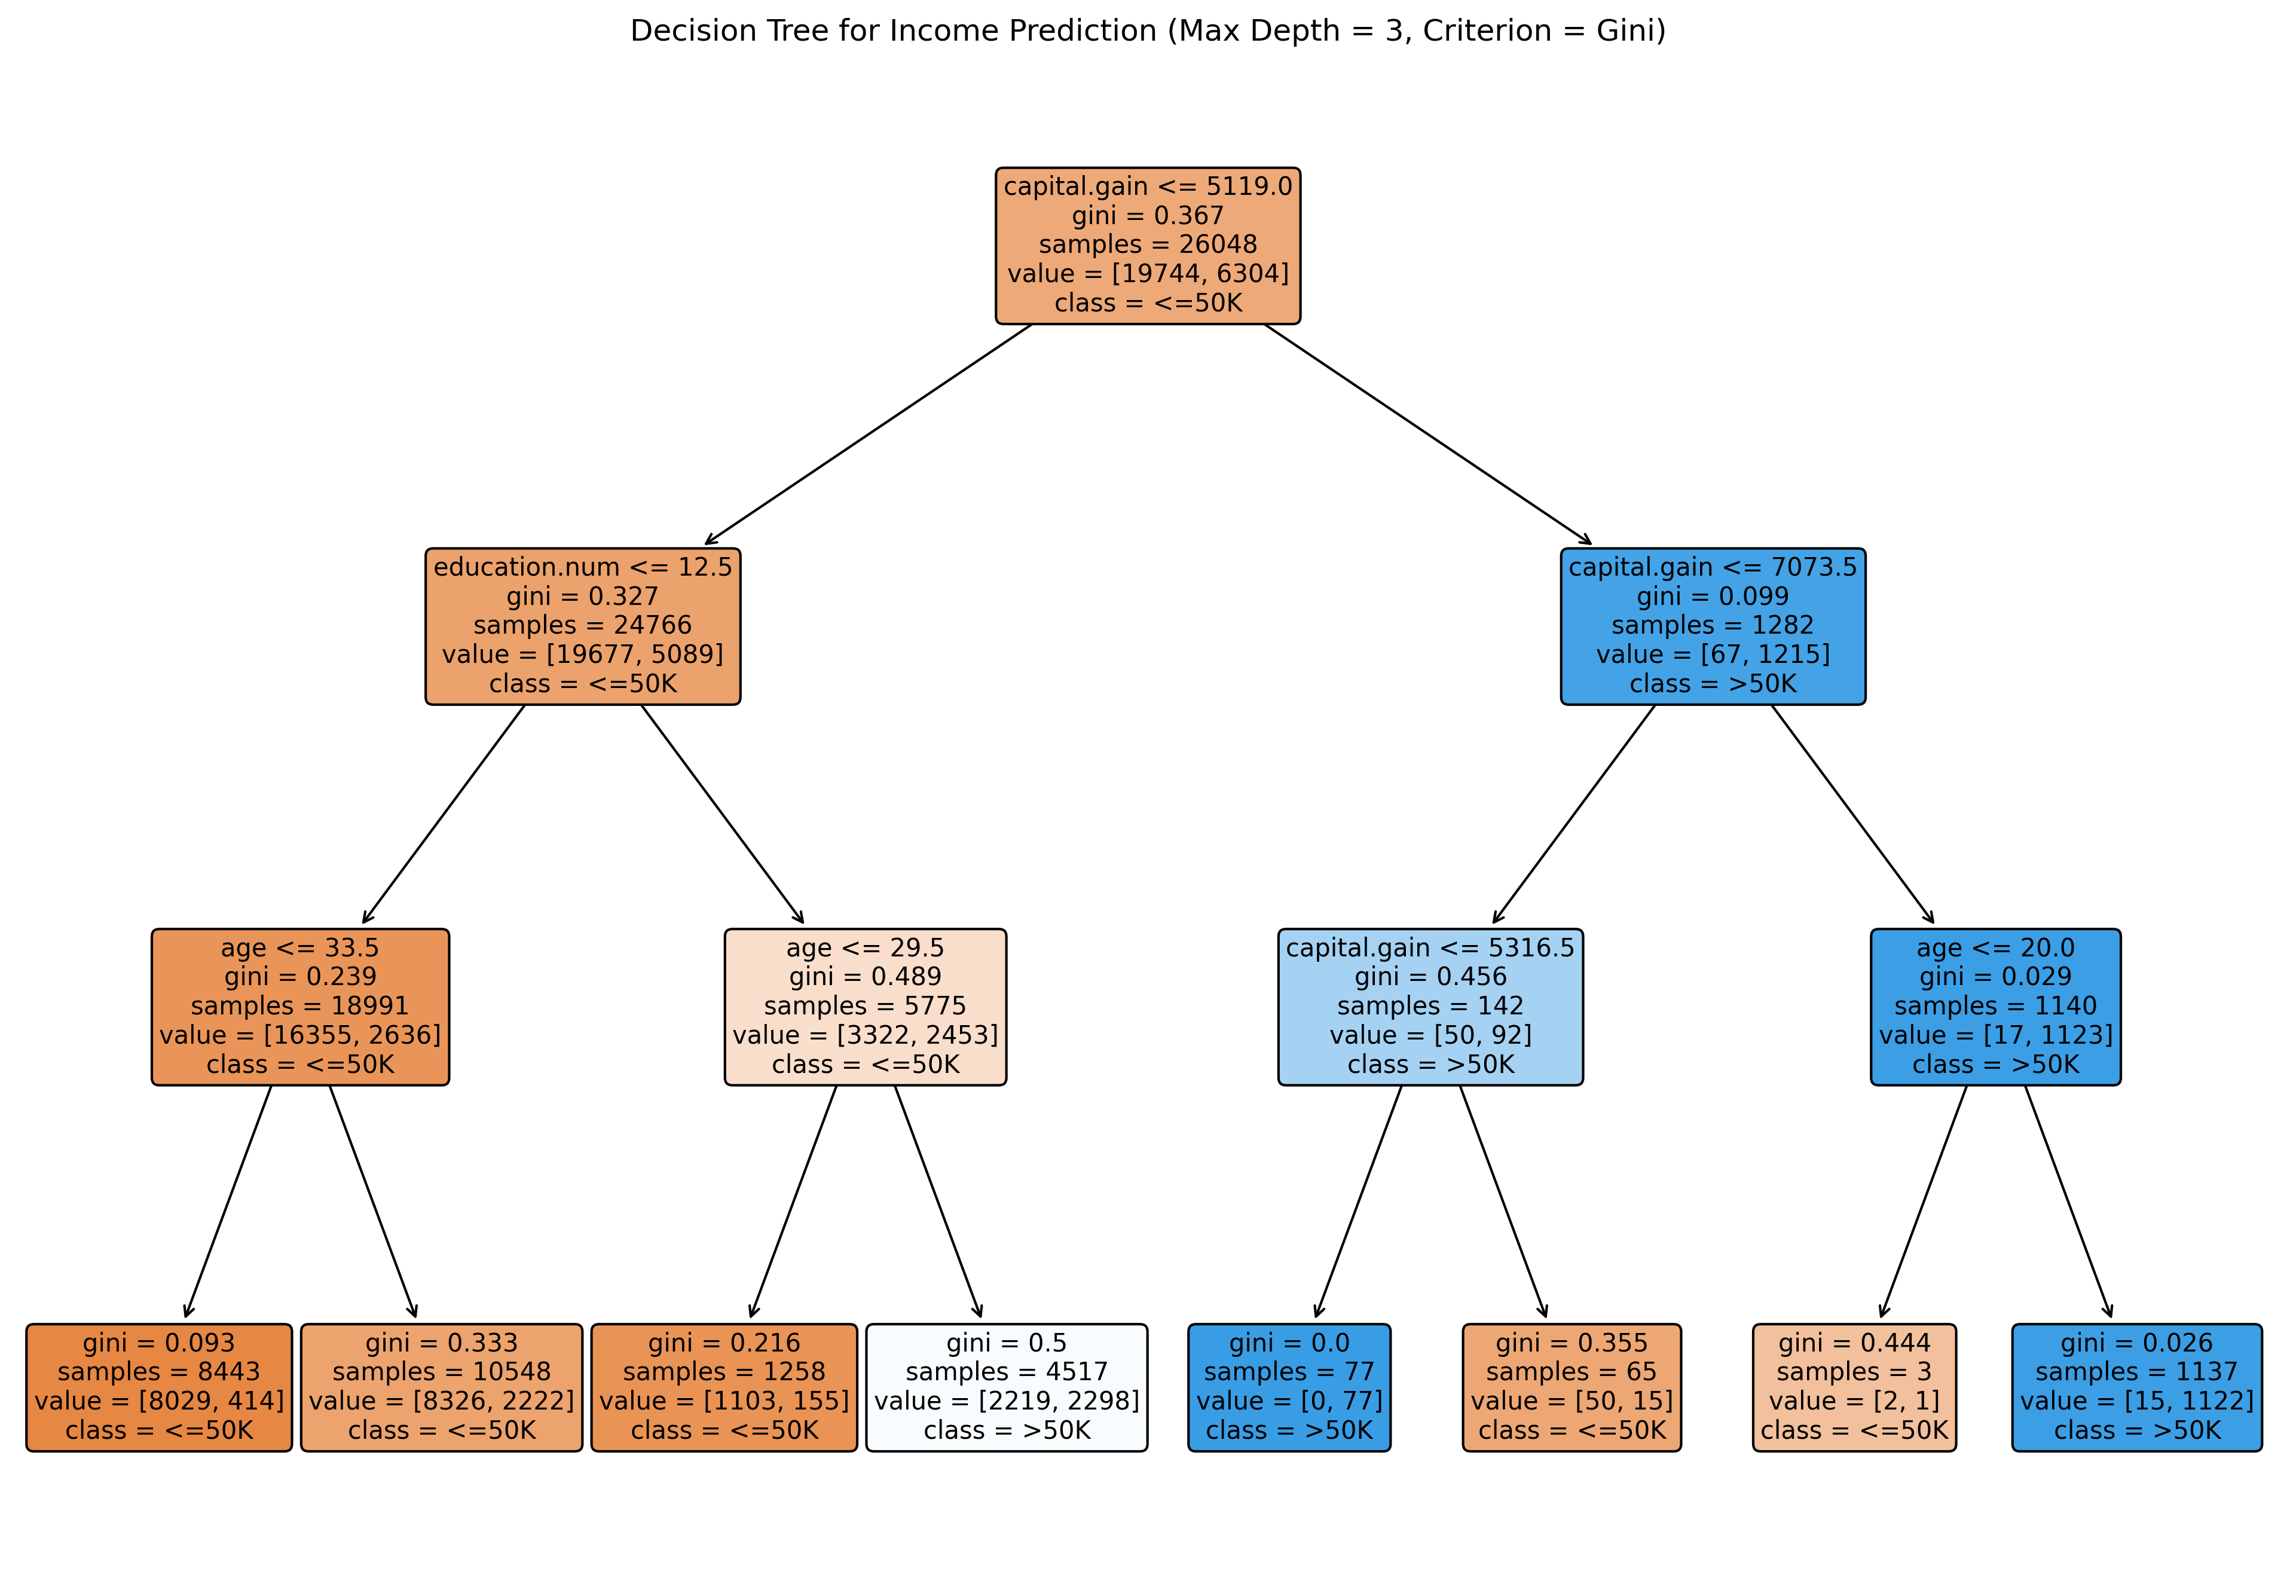

In [19]:
## Criterion Gini Index

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print("Model accuracy score with criterion gini: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))
print("Training set score: {0:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(X_test, y_test)))

plt.figure(figsize=(13, 9), dpi=300)
plot_tree(clf_gini, 
          feature_names=X_train.columns,  
          class_names=['<=50K', '>50K'],  
          filled=True,  
          rounded=True,  
          fontsize=10,   
          max_depth=3)   

plt.title("Decision Tree for Income Prediction (Max Depth = 3, Criterion = Gini)")
plt.tight_layout()  
plt.show()


## creates a decision tree using gini with a depth of 3 and random_state=0 to ensures reproducibility for the tree’s structure.
## use the trained model to make predictions on the test set
## calculates and computes the model accuracy
## creates and displays the decision tree of gini

In [20]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

print("Classification Report gini")
print(classification_report(y_test, y_pred_gini))

## generates a detailed classification report for the entropy-based and gini-based models

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4976
           1       0.59      0.54      0.56      1537

    accuracy                           0.80      6513
   macro avg       0.73      0.71      0.72      6513
weighted avg       0.80      0.80      0.80      6513

Classification Report gini
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4976
           1       0.61      0.54      0.57      1537

    accuracy                           0.81      6513
   macro avg       0.73      0.71      0.72      6513
weighted avg       0.80      0.81      0.80      6513



In [21]:
## Naive Bayes

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

nb_y_pred = nb_classifier.predict(X_test)

print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))
print("Classification Report")
print(classification_report(y_test, nb_y_pred, target_names=['<=50K', '>50K']))

## creates a Naive Bayes classifier using the Gaussian distribution.
## use the trained model to make predictions on the test set
## calculates the accuracy of the Naive Bayes model by comparing the predicted values (nb_y_pred) with the actual values (y_test).
## generates a detailed classification report that includes the following metrics for each class

Model accuracy score with Naive Bayes: 0.7950
Classification Report
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      4976
        >50K       0.64      0.30      0.41      1537

    accuracy                           0.80      6513
   macro avg       0.73      0.62      0.64      6513
weighted avg       0.77      0.80      0.77      6513



In [22]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

## creates a Random Forest Classifier
## use the trained model to make predictions on the test set
## The model makes predictions on the test data, and the performance is evaluated using accuracy, confusion matrix, and classification report.

Accuracy: 81.07%
Confusion Matrix:
[[4508  468]
 [ 765  772]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      4976
        >50K       0.62      0.50      0.56      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.70      0.72      6513
weighted avg       0.80      0.81      0.80      6513



In [23]:
## Conclusion

print("Among Entropy, Gini, Naive Bayes, and Random Forest Classifier, Random Forest Classifier has the highest accuracy at 81%. Using Random Forest Classifier we can predict the income of an adult with relatively good accuracy")

Among Entropy, Gini, Naive Bayes, and Random Forest Classifier, Random Forest Classifier has the highest accuracy at 81%. Using Random Forest Classifier we can predict the income of an adult with relatively good accuracy
